In [376]:
#!pip install beautifulsoup4
#!pip install lxml
#!pip install requests


In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [2]:
r=requests.get("https://sarki.alternatifim.com/sarkici/zeki-muren/ah-bu-sarkilarin-gozu-kor-olsun")

In [5]:
r.status_code #200 alıyorsak tüm verileri alabiliyoruz.

200

In [4]:
pages = [1,2,3,4,5,6,7,8,9,10,11]

links = []

for page in pages:
    url = 'https://sarki.alternatifim.com/sarkici/zeki-muren/sayfa-{page}'.format(page=page)
    root_url = 'https://sarki.alternatifim.com/'

    response = requests.get(url)
    data = response.text

    soup = BeautifulSoup(data, 'html.parser')

    for link in soup.findAll('a'):
              if link.get('href').startswith('/sarkici/'):
                    links.append(root_url + str(link.get('href')))


In [5]:

print("Number of songs: {n}".format(n=len(links)))

Number of songs: 519


In [6]:
names=pd.DataFrame([i.split('https://sarki.alternatifim.com//sarkici/zeki-muren/') for i in links],columns=["index","name"])

In [7]:
names.head()

,index,name
0,,a-fadimem
1,,acaba
2,,acemkurdi-pesrev
3,,acilara-gucendim
4,,acik-birak-pencereni


In [8]:
lyrics=[]

for lyrics_url in links:
        data = requests.get(lyrics_url).text
        soup = BeautifulSoup(data, 'html.parser')

        paragraph = soup.find('div', attrs={"class":"sarkisozu"}).text.split("\n")
        line=pd.DataFrame(paragraph).iloc[1,0].split("\r")
        lyrics.append(line)

In [9]:
lyric=pd.DataFrame(pd.Series(lyrics).values.reshape(-1,1),columns=["lyric"])

In [10]:
lyric.head()

,lyric
0,"[A Fadimem hadi senle kaçalım, Beyce de pazarı..."
1,"[Bilmem ki unuttun mu , Dudakların adımı , Göz..."
2,[Şarkı enstrümantal olduğu için şarkı sözü bul...
3,"[Bana derdi çektiren, Göz yaşlarımı döktüren, ..."
4,"[Açık bırak pencereni, Örtme perdeyi bu gece, ..."


In [11]:
data=pd.concat([names,lyric],axis=1)

In [12]:
data.head()

,index,name,lyric
0,,a-fadimem,"[A Fadimem hadi senle kaçalım, Beyce de pazarı..."
1,,acaba,"[Bilmem ki unuttun mu , Dudakların adımı , Göz..."
2,,acemkurdi-pesrev,[Şarkı enstrümantal olduğu için şarkı sözü bul...
3,,acilara-gucendim,"[Bana derdi çektiren, Göz yaşlarımı döktüren, ..."
4,,acik-birak-pencereni,"[Açık bırak pencereni, Örtme perdeyi bu gece, ..."


In [13]:
#data.to_csv("zeki.csv",index=False,header=False)
#data.to_csv(r'C:\Users\ASUS\Desktop\zeki.csv', index=False) 


In [14]:
df=data.copy()

In [15]:
df.head()

,index,name,lyric
0,,a-fadimem,"[A Fadimem hadi senle kaçalım, Beyce de pazarı..."
1,,acaba,"[Bilmem ki unuttun mu , Dudakların adımı , Göz..."
2,,acemkurdi-pesrev,[Şarkı enstrümantal olduğu için şarkı sözü bul...
3,,acilara-gucendim,"[Bana derdi çektiren, Göz yaşlarımı döktüren, ..."
4,,acik-birak-pencereni,"[Açık bırak pencereni, Örtme perdeyi bu gece, ..."


In [16]:
df["lyric"]=df["lyric"].astype(str).str.lstrip("[").str.rstrip("]")

In [17]:
df.head()

,index,name,lyric
0,,a-fadimem,"'A Fadimem hadi senle kaçalım', 'Beyce de paza..."
1,,acaba,"'Bilmem ki unuttun mu ', 'Dudakların adımı ', ..."
2,,acemkurdi-pesrev,'Şarkı enstrümantal olduğu için şarkı sözü bul...
3,,acilara-gucendim,"'Bana derdi çektiren', 'Göz yaşlarımı döktüren..."
4,,acik-birak-pencereni,"'Açık bırak pencereni', 'Örtme perdeyi bu gece..."


In [18]:
df['lyric'] = df['lyric'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['name'] = df['name'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [19]:
df.head()

,index,name,lyric
0,,a-fadimem,"'a fadimem hadi senle kaçalım', 'beyce de paza..."
1,,acaba,"'bilmem ki unuttun mu ', 'dudakların adımı ', ..."
2,,acemkurdi-pesrev,'şarkı enstrümantal olduğu için şarkı sözü bul...
3,,acilara-gucendim,"'bana derdi çektiren', 'göz yaşlarımı döktüren..."
4,,acik-birak-pencereni,"'açık bırak pencereni', 'örtme perdeyi bu gece..."


In [20]:
df['lyric'] = df['lyric'].str.replace('[^\w\s]','')
df['lyric'] = df['lyric'].str.replace('\d','')
df['name'] = df['name'].str.replace('\d',' ')

In [21]:
df.head()

,index,name,lyric
0,,a-fadimem,a fadimem hadi senle kaçalım beyce de pazarınd...
1,,acaba,bilmem ki unuttun mu dudakların adımı gözler...
2,,acemkurdi-pesrev,şarkı enstrümantal olduğu için şarkı sözü bulu...
3,,acilara-gucendim,bana derdi çektiren göz yaşlarımı döktüren hay...
4,,acik-birak-pencereni,açık bırak pencereni örtme perdeyi bu gece san...


In [22]:
df["lyric"][2]

'şarkı enstrümantal olduğu için şarkı sözü bulunmamaktadır '

In [23]:
df[df["lyric"]=="şarkı enstrümantal olduğu için şarkı sözü bulunmamaktadır "]

,index,name,lyric
2,,acemkurdi-pesrev,şarkı enstrümantal olduğu için şarkı sözü bulu...
252,,hicaz-klarnet-taksimi,şarkı enstrümantal olduğu için şarkı sözü bulu...
253,,hicaz-pesrevi,şarkı enstrümantal olduğu için şarkı sözü bulu...
261,,huzzam-kanun-taksimi,şarkı enstrümantal olduğu için şarkı sözü bulu...
289,,kanun-taksimi,şarkı enstrümantal olduğu için şarkı sözü bulu...
303,,keman-taksimi,şarkı enstrümantal olduğu için şarkı sözü bulu...
311,,klarnet-taksimi,şarkı enstrümantal olduğu için şarkı sözü bulu...
319,,kurdili-hicazkar-saz-semaisi,şarkı enstrümantal olduğu için şarkı sözü bulu...
333,,muhayyer-kurdi-pesrevi,şarkı enstrümantal olduğu için şarkı sözü bulu...
355,,neva-pesrev,şarkı enstrümantal olduğu için şarkı sözü bulu...


In [24]:
df=df.drop(df[df["lyric"]=="şarkı enstrümantal olduğu için şarkı sözü bulunmamaktadır "].index)

In [25]:
df.head()

,index,name,lyric
0,,a-fadimem,a fadimem hadi senle kaçalım beyce de pazarınd...
1,,acaba,bilmem ki unuttun mu dudakların adımı gözler...
3,,acilara-gucendim,bana derdi çektiren göz yaşlarımı döktüren hay...
4,,acik-birak-pencereni,açık bırak pencereni örtme perdeyi bu gece san...
5,,acilan-bir-gul-gibi,açılan bir gül gibi gir kalbe gönül gibi coşar...


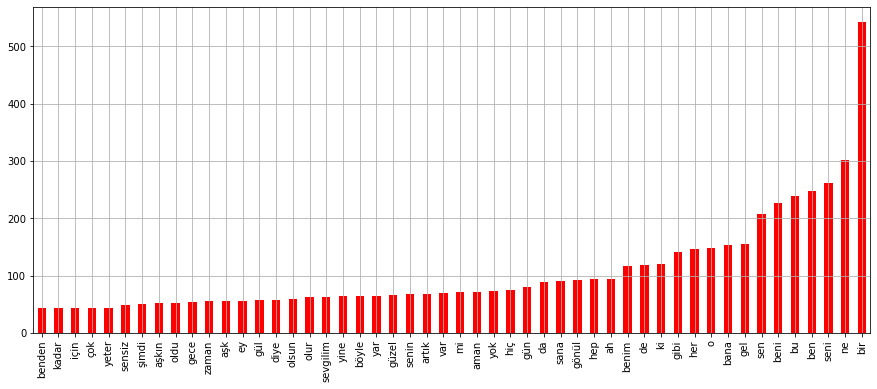

In [26]:
plt.figure(figsize=(15,6))
pd.Series(' '.join(df['lyric']).split()).value_counts().sort_values()[-50:].plot.bar(color="r")
plt.grid()

In [27]:
df["length"]=df["lyric"].str.len()

In [28]:
df.head()

,index,name,lyric,length
0,,a-fadimem,a fadimem hadi senle kaçalım beyce de pazarınd...,198
1,,acaba,bilmem ki unuttun mu dudakların adımı gözler...,313
3,,acilara-gucendim,bana derdi çektiren göz yaşlarımı döktüren hay...,270
4,,acik-birak-pencereni,açık bırak pencereni örtme perdeyi bu gece san...,280
5,,acilan-bir-gul-gibi,açılan bir gül gibi gir kalbe gönül gibi coşar...,245


In [29]:
df[["name","length"]].sort_values(by="length").nlargest(columns=["length"],n=10)

,name,length
325,masal,1519
280,kahir-mektubu,1512
473,uzun-yillar-bekledim-kakikat-oldu-ruyam,1512
95,bir-ilkbahar-sabahi,788
81,beni-sevmeni-istiyorum,613
432,sirilsiklam-seviyorum,607
223,gul-yuzlulerin-sevkine-gel,603
134,cigan-cocuklari,597
493,yanimda-sen-olmayinca,560
191,gel-neredeysen,557


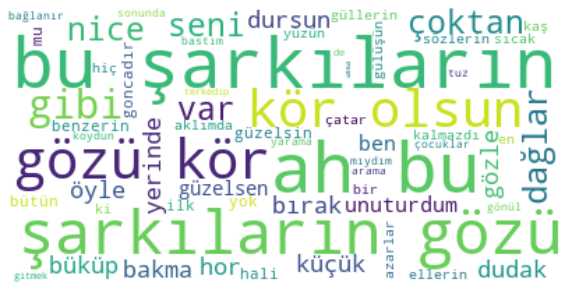

In [30]:
wordcloud = WordCloud(max_font_size = 50,
                     max_words = 100, 
                     background_color = "white").generate(df["lyric"][13]) #ah bu şarkıların gözü kör olsun
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show()